<small><i>Based on a notebook put together by Jake Vanderplas.</i></small>

# Principal Component Analysis - Dimensionality Reduction

### Example: height, weight, income for the female population in the US; 
### Show Gaussian distribution for one variable first.

## Machine Learning Techniques:

- ### PCA
- ### SVM

## You will NOT be writing the code at the heart of these algorithms.  (You can -- but it will take a lot of time, and it will take a lot of testing to make your code fast and robust).

## So the approach here is 

- ### I will help you understand the concepts and math behind the code so that you

    ### (i) understand why it works
    ### (ii) can code it up yourself if needed
   
- ### The most general/common strategies and tactics in ML as demonstrated in these two techniques, so that when you do write your own ML code one day, you can apply these test-and-true principles/strategies/tactics. 

# First do this (may not be necessary for 13-1):
\> pip install mpld3

## (Actually this is not necessary -- Dec, 2016)

In [1]:
%matplotlib inline

''' Initial Imports'''
# The following should enable zoom-in and rotation of 3d plots.
# pip install mpld3, if necessary.  Note: it messes up the colorbar just a bit.
# import mpld3
# mpld3.enable_notebook()

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


#********************* THE MAIN IMPORT OF THIS LECTURE********************************
from sklearn.decomposition import PCA

## Variance and Standard Deviation

## Strictly speaking, these quantities only refer to the Gaussian distribution.

## The variance:

$$
Var = \langle (x_i - \bar{x})^2 \rangle = \frac {\sum_{i}{(x_i - \bar{x})^2}}{N}
$$

## and the standard deviation, $\sigma$:

$$
\sigma = \sqrt{Var}
$$
 

## Breakout: Plot the histograms of two Gaussian random variables, one with a standard deviatoin of 1 and the other 5, with the average of either being 2.

## If the variance around the average is too small, then sometimes one can safely replace a random variable with its average (or zero variance).

## Introducing Principal Component Analysis

Principal Component Analysis is a very powerful unsupervised method for *dimensionality reduction* in data.  It's easiest to visualize by looking at a two-dimensional dataset:

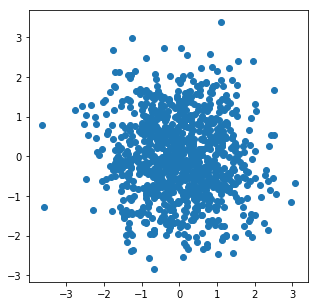

In [2]:
'''2 sets of uncorrelated random numbers'''

x1 = np.random.randn(1000)
x2 = np.random.randn(1000)
plt.figure(figsize = (5, 5))
plt.plot(x1, x2, 'o')
plt.show()

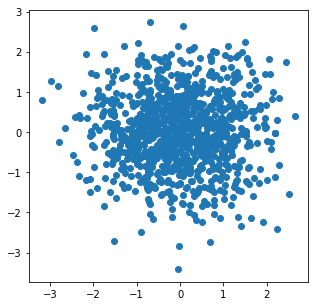

In [3]:
'''Alternative way generate 2 sets of uncorrelated random numbers'''
X = np.random.randn(2, 1000).T
plt.figure(figsize = (5, 5))
plt.plot(X[:, 0], X[:, 1], 'o')
plt.show()

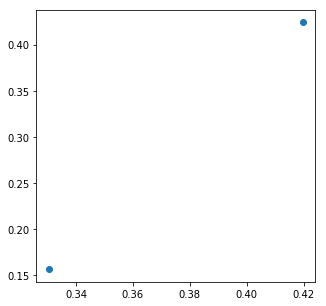

In [4]:
'''
Correlated random numbers

Why would the matrix multiplication generate correlated random numbers?

Just "do the math", and you will see!


'''
X = np.dot(np.random.rand(2, 2), np.random.rand(2, 2))
x1 = X[:, 0]
x2 = X[:, 1]
plt.figure(figsize = (5, 5))
plt.plot(x1, x2, 'o')
plt.show()

(200, 2)


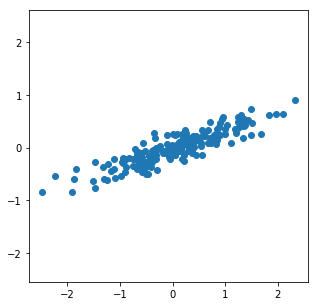

In [5]:
'''

Generate correlated random numbers (say temperature and ice-cream sales)

Turns out if you use r1 = np.random.randn(2, 2) you get a weak anti-correlation


'''

np.random.seed(1)
# make a 2x200 matrix where for each column, the randomness is also 
# spread out in the y-direction.

r1 = np.random.rand(2, 2)
r2 = np.random.randn(2, 200)

X = np.dot(r1, r2).T

x1 = X[:, 0]
x2 = X[:, 1]

print(X.shape)
plt.figure(figsize = (5, 5))
plt.plot(x1, x2, 'o')
# 'equal' forces the units of x and y to be the same,
# it's equivalent to plt.axis(-lim, lim, -lim, lim)
plt.axis('equal')
plt.show()

In [6]:
var1 = np.var(X[:, 0])
var2 = np.var(X[:, 1])
print('Variance along x1 and x2:', var1, var2)
print('Total variance:', var1 + var2)

Variance along x1 and x2: 0.678766717934 0.09833763148
Total variance: 0.777104349414


## We can see that there is a definite trend in the data. What PCA seeks to do is to find the **Principal Axes** in the data, and explain how important those axes are in describing the data distribution:

In [7]:
'''

In the following note that the two pca components are unit vectors:

[0.94446029,  0.32862557]

and 

[0.32862557, -0.94446029];

check for yourself!

'''

pca = PCA(n_components=2)
pca.fit(X)
# percentage of the variance.
print(pca.explained_variance_)
print("Total variance:", pca.explained_variance_.sum())
print(pca.explained_variance_ratio_)
# principal axes
print(pca.components_)

[ 0.7625315  0.0184779]
Total variance: 0.781009396396
[ 0.97634101  0.02365899]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


## Note Python convention: 

### "attributes that end with single\_trailing\_underscore\_ : used by convention to avoid conflicts with Python keyword, e.g.

### Tkinter.Toplevel(master, class\_='ClassName')"

## Although that doesn't seem to be the case here:

- ### explainted\_variance\_
- ### explained\_variance\_ratio

## On the other hand, 

### "Use one leading underscore only for non-public methods and instance variables."

## This seems to be a better explanation of the usage of the underscores here (though they are trailing): you shouldn't change these attributes.

### The quotes above are from the "official" Python conventions:

https://www.python.org/dev/peps/pep-0008/#naming-conventions

## To see what these numbers mean, let's view them as vectors plotted on top of the data:

length, vector 0.762531500883 [-0.94446029 -0.32862557]
length, vector 0.0184778955136 [-0.32862557  0.94446029]


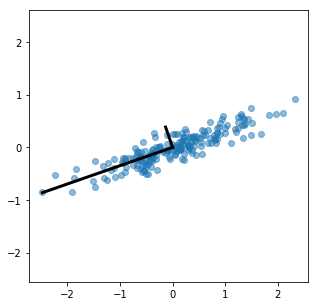

In [8]:
'''
Again remember that the two pca components are unit vectors:

[0.94446029,  0.32862557]

and 

[0.32862557, -0.94446029];


- PCA axis (pca.components_): Eigevectors (unit vectors) -- gives direction of PCA vector
    
    0th pca axis: (u0[0], u0[1])
    1st pca axis: (u1[0], u1[1])
    ...


- PCA explained_variance (pca.explained_variance_): Eigenvalues -- gives length of PCA vectors

'''

plt.figure(figsize = (5, 5))
plt.plot(x1, x2, 'o', alpha=0.5)
# below v are the principal axes; and length indicates percentage of the variance.
for length, unit_vec in zip(pca.explained_variance_, pca.components_):
    print('length, vector', length, unit_vec)
    # Each component of vector gives the variance in each of the two principal directions
    # Remember, sqrt(variance) = std dev, or 1-sigma; thus, 3*sqrt(length) is 3-sigma.
    u = unit_vec * 3 * np.sqrt(length)
    plt.plot([0, u[0]], [0, u[1]], 'k-', lw=3)
plt.axis('equal')
plt.show()



## Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.


## The explained variance quantifies this measure of "importance" in direction.

## Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

Actually this is a pretty good example of PCA: https://www.youtube.com/watch?v=oBhm2V_cGZk 

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.matplots((2, 2, sharex()))

In [ ]:
''' I need to redo the plot -- right now it's plot against the index. 
If I do a histogram, I should be able to see the variance that corresponds to 
the 1st principal direction.

'''

# keep 95% of variance
pca = PCA(n_components=2)

# pca95 = PCA(0.95) 
# fit_transform finds the PCA components 
# and rotate the data to the principal axes
X_trans = pca95.fit_transform(X)
# I can construct the transformed X by hand, and

X_trans_ByHand = - 0.94446029*x1 - 0.32862557*x2

print(X.shape)
print(X_trans.shape)

plt.figure(figsize = (5, 5))
plt.plot(new_x, X_trans, 'bo')
plt.ylim([-3, 3])
plt.show()

In [ ]:
''' 
Or you can let the function PCA decide how many components to keep
'''

# keep 95% of variance
pca95 = PCA(0.95) 
# fit_transform finds the PCA components 
# and rotate the data to the principal axes
X_trans = pca95.fit_transform(X)

print(X.shape)
print(X_trans.shape)

plt.figure(figsize = (5, 5))
# if you tilt your head so that the symmetry axis of your face 
# is lined up with the 0th principal axis, and ignore 
# (or compress the data in the direction of) the 1st principel axis,
# then you will see this
plt.plot(np.zeros(len(X_trans)), X_trans, 'bo')
plt.ylim([-3, 3])
plt.show()

## By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

In [ ]:
# inverse_transform takes you back to the original axes.
X_new = pca95.inverse_transform(X_trans)
plt.figure(figsize = (5, 5))
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'bo', alpha=0.8)
plt.axis('equal')
plt.show()

## The light points are the original data, while the dark points are the projected version.  We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!  That is, we can replace the semi-transparent data points with the solid data points, and these points contain 95% of the information.  Think in terms of the moment of inertia: for certain experiments, an object shaped like the outline of the semi-transparent data points behaves in very much the same way as an infinitely thin "needle".

## This is **dimensionality reduction**: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting a mathematical/statistical model to the data.

## End of week13-1